# Sentiment Analysis Demonstration

In this script I will demonstrate how you can perform your own sentiment analysis. I will take some processed data on movie reviews from Kaggle and show you how to pull this data, some transformations, vectorization, and model the sentiment. 

Data Source:
Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

In [49]:
# We start with importing the packages that will be used through out
import nltk, random
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The dataset has two columns, one with the  text and one with the positive/negative sentiment identifier 
reviews_df = pd.read_csv('/Users/evgenyb/Desktop/Sentiment_Data/IMDB Dataset.csv')
reviews_df = reviews_df.iloc[:2000]

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

# This is a function to clean the text, it is complex for the purpose of the presentation so I will break it down:
## first remove any possible HTML character, if you scrape data this will sometimes be present
## remove non-alphabetic characters and lower case all of the text
## tokenize the text, this is a process for breaking down sentences into the smallest possible parts ('tokens')
## remove all of the stopwords, these are the common small words like 'at','if','the',etc
## obtain the root of the word also known as 'stemming' ex. 'sitting' --> 'sitt' --> 'sit'
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    text = ' '.join(words)
    return text

reviews_df['review']=reviews_df['review'].apply(clean_text)

print(reviews_df.head())
# The seed records the randomization of the shuffle, we do this so that results can be replecated 
random.seed(708)
random.shuffle(reviews) # randomize order of reviews to have random split of pos/neg reviews in train/test

                                              review sentiment
0  one review mention watch oz episod hook right ...  positive
1  wonder littl product film techniqu unassum old...  positive
2  thought wonder way spend time hot summer weeke...  positive
3  basic famili littl boy jake think zombi closet...  negative
4  petter mattei love time money visual stun film...  positive


### Splitting Data for Modeling

The code below takes the data we have transformed in the first part and splits it into two seperate sets. The first is for training the model, and then next is for testing the model.

In [50]:
# Defining the train and test sets
from sklearn.model_selection import train_test_split
X = reviews_df['review']
y = reviews_df['sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.35, random_state=42) # split our data into train/test


### Vectorizing 

Vectorizing is the key in having a functioning NLP model. This process takes all of the words in a text and transforms them into a vector of 1's and 0's. The computer will be able to understand the input afterwards. There are a couple of ways to do this with different algorithms such as: Bag of Words, TF-IDF

What each of these methods aims to accomplish is to look for key words within each text. Certain words appear very consistently accross texts and the algorithm will work to remove the importance of these words. Examples of such words are: 'of','the','in','to','at', etc.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidVector = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidVector.fit_transform(X_train)
X_test_bow = tfidVector.transform(X_test)

### Model

There are many models that can be applied to NLP and there are benefits to each one. In this case I ran it with a logistical regression as the idea behind it is very intuitive. It estimates the probability of an event occuring, and in our case, will show if the text is positive or negative.

In [52]:
from sklearn.linear_model import LogisticRegression

# Import the model that will be used to predict sentiment of the review, I chose logit with no particular reason
logit = LogisticRegression()
logit.fit(X_train_bow, y_train)

print(logit.score(X_test_bow, y_test))

0.8228571428571428


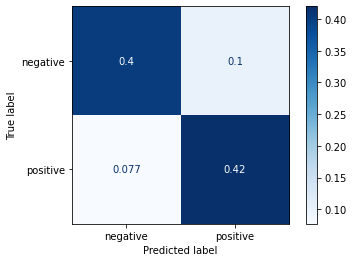

In [53]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Plot of a matrix to show how consistent the model is
plot_confusion_matrix(logit, X_test_bow, y_test, normalize='all',cmap=plt.cm.Blues)

In [58]:
#Try it with some custom reviews!
new_r = ['This movie is bad','This movie is great']
new_r_bow = tfidVector.transform(new_r)
logit.predict(new_r_bow)

array(['negative', 'positive'], dtype=object)